In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install healpy astropy matplotlib numpy


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.9/8.9 MB 77.7 MB/s eta 0:00:00


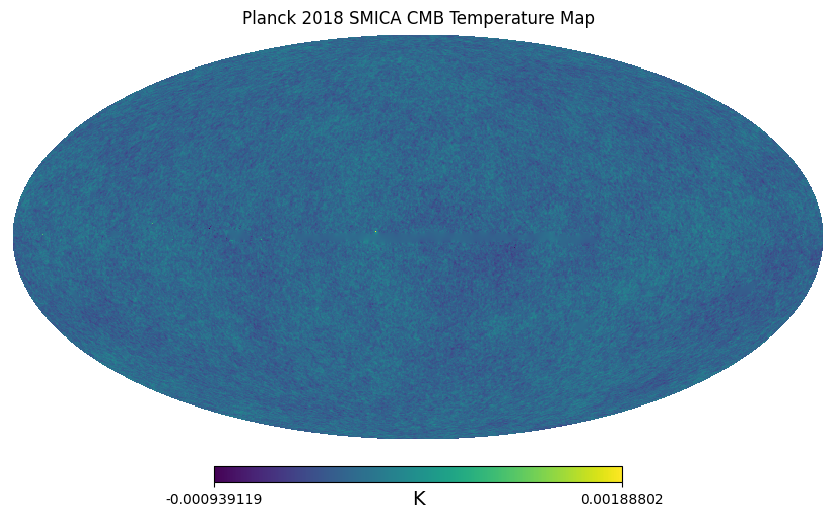

In [3]:
import healpy as hp
import matplotlib.pyplot as plt

fits_path = "/content/drive/MyDrive/PlanckDeep/COM_CMB_IQU-smica_2048_R3.00_full.fits"

# Load Temperature (field=0)
cmb_map = hp.read_map(fits_path, field=0)

# Visualize the full sky map
hp.mollview(cmb_map, title="Planck 2018 SMICA CMB Temperature Map", unit="K")
plt.show()


In [4]:
import numpy as np

def extract_patches(hmap, patch_size=64, num_patches=1000):
    patches = []
    for _ in range(num_patches):
        theta = np.random.uniform(0, np.pi)
        phi = np.random.uniform(0, 2 * np.pi)
        patch = hp.gnomview(hmap, rot=(np.degrees(phi), np.degrees(theta)),
                            xsize=patch_size, return_projected_map=True, no_plot=True)
        patches.append(patch)
    return np.array(patches)

patches = extract_patches(cmb_map, patch_size=64, num_patches=1000)
print("Patches shape:", patches.shape)


Patches shape: (1000, 64, 64)


In [5]:
np.save("/content/drive/MyDrive/PlanckDeep/cmb_patches.npy", patches)

# Optionally create fake binary labels
labels = np.random.randint(0, 2, size=(patches.shape[0],))
np.save("/content/drive/MyDrive/PlanckDeep/cmb_labels.npy", labels)
